<a href="https://colab.research.google.com/github/abdullahalmusabbir/Review-Paper-Code/blob/main/10_A_Machine_Learning_Approach_to_Predictive_Modeling_for_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
dataset = fetch_ucirepo(id=17)
X = dataset.data.features
y = dataset.data.targets

print("Shape of Features:", X.shape)
print("Shape of Target:", y.shape)

Shape of Features: (569, 30)
Shape of Target: (569, 1)


In [7]:
if y.dtypes[0] == "object":
    le = LabelEncoder()
    y = le.fit_transform(y.values.ravel())

print("Encoded Target Sample:", y[:10])

Encoded Target Sample: [1 1 1 1 1 1 1 1 1 1]


/tmp/ipython-input-3183032975.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if y.dtypes[0] == "object":


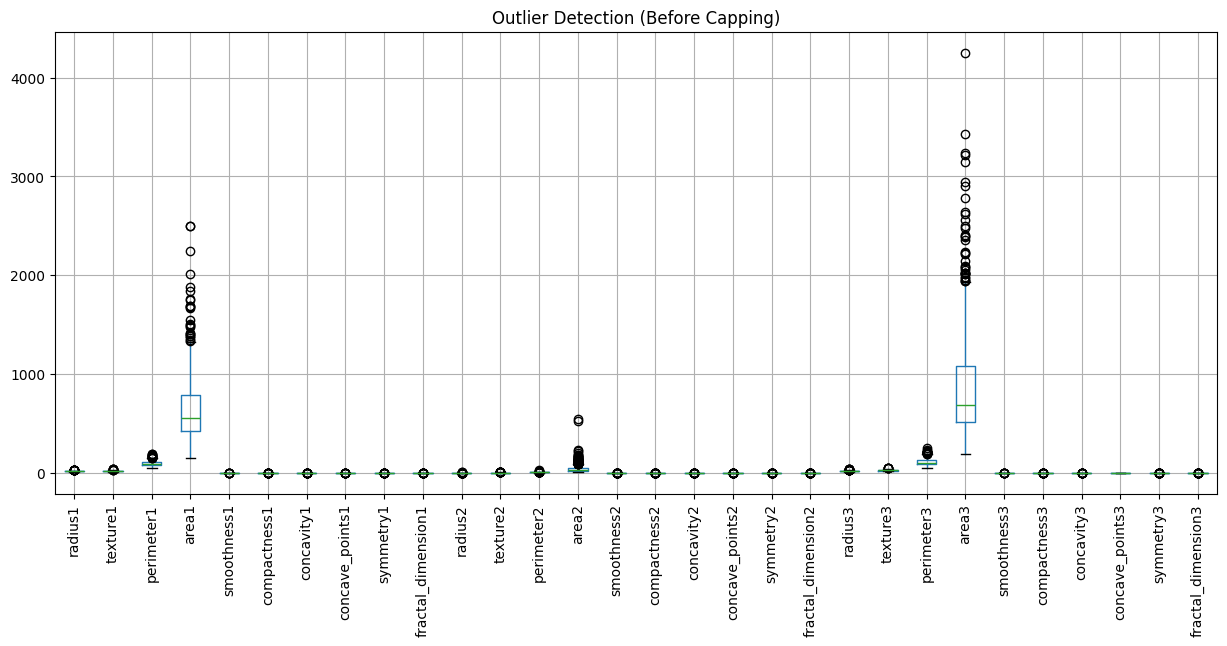

In [8]:
numeric_cols = X.select_dtypes(include=np.number).columns

# Boxplot for outlier visualization
plt.figure(figsize=(15,6))
X[numeric_cols].boxplot(rot=90)
plt.title("Outlier Detection (Before Capping)")
plt.show()

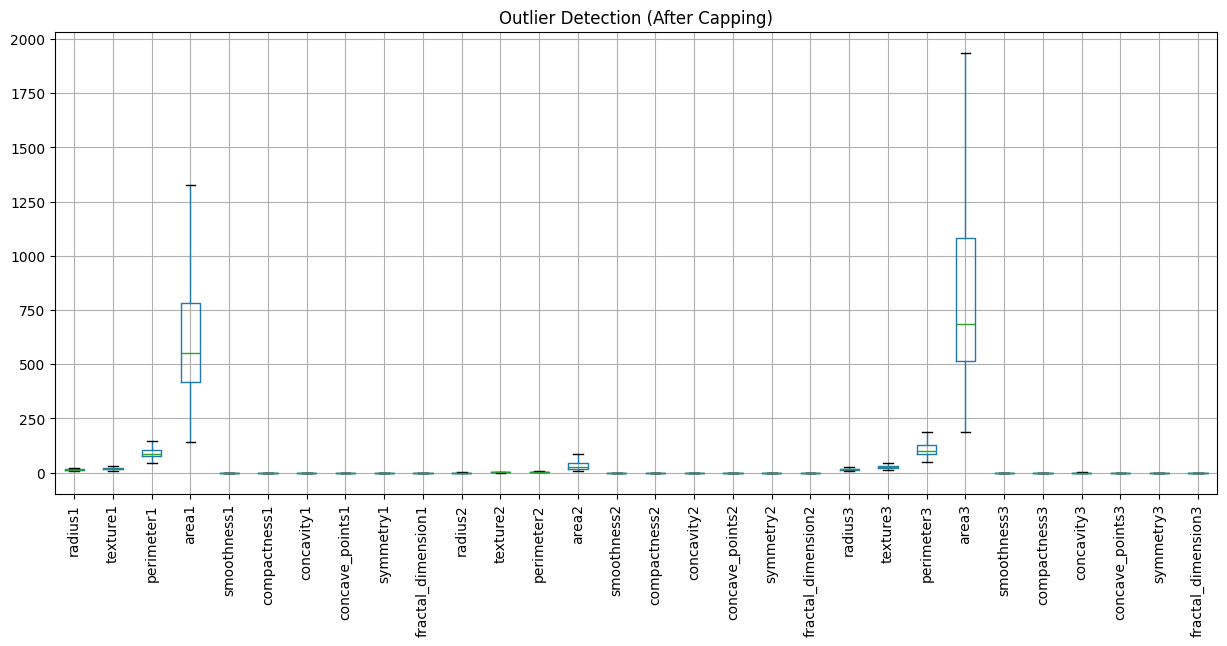

In [9]:
def cap_outliers(df):
    capped_df = df.copy()
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        capped_df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
    return capped_df

X_capped = cap_outliers(X)

# Boxplot after capping
plt.figure(figsize=(15,6))
X_capped[numeric_cols].boxplot(rot=90)
plt.title("Outlier Detection (After Capping)")
plt.show()

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_capped)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [12]:
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "SVM": SVC(kernel="rbf", random_state=42)
}

In [13]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Naive Bayes Accuracy: 0.9298
Confusion Matrix:
 [[70  2]
 [ 6 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        72
           1       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114


Random Forest Accuracy: 0.9737
Confusion Matrix:
 [[72  0]
 [ 3 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree Accuracy: 0.9298
Confusion Matrix:
 [[68  4]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

           

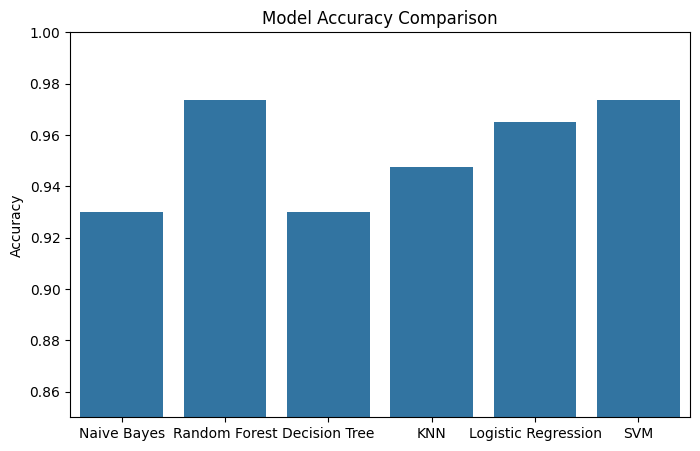

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.85, 1.0)
plt.show()